# End-to-End Fetal Health Classification
## Predicting fetal health using (X model)

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In this project, we will be building a model to classify fetal health in order to prevent child and maternal mortality.

## 1. Project Definition
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

## 2. Data
This dataset contains 2,126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

## 3. Evaluation
To be determined to a greater degree later.  At this point, thinking 90% accuracy with a higher emphasis on fewer false negatives.

## 4. Feature Definitions

* **baseline value** - Baseline Fetal Heart Rate (FHR)

* **accelerations** - Number of accelerations per second

* **fetal_movement** - Number of fetal movements per second

* **uterine_contractions** - Number of uterine contractions per second.  Uterine contractions can compress the blood vessels in the uterus, potentially interfering in the transfer of oxygen to the placenta and the baby. Contractions can also compress the umbilical cord, which may affect the flow of oxygenated blood to the baby.

* **light_decelerations** - Number of LDs per second.  Fetal decelerations refer to temporary but distinct decreases of the fetal heart rate (FHR) identified during electronic fetal heart monitoring

* **severe_decelerations** - Number of SDs per second

* **prolongued_decelerations** - Number of PDs per second

* **abnormal_short_term_variability** - Percentage of time with abnormal short term variability.  STV is the beat-to-beat variation in fetal heart rate

* **mean_value_of_short_term_variability** - STV is the beat-to-beat variation in fetal heart rate

* **percentage_of_time_with_abnormal_long_term_variability** - LTV is the beat-to-beat variation in fetal heart rate

* **mean_value_of_long_term_variability** - LTV is the beat-to-beat variation in fetal heart rate

* **histogram_width** - Width of the histogram made using all values from a record

* **histogram_min**

* **histogram_max**

* **histogram_number_of_peaks** - Number of peaks in the exam histogram

* **histogram_number_of_zeroes**

* **histogram_mode**

* **histogram_mean**

* **histogram_median**

* **histogram_variance**

* **histogram_tendency**

* **fetal_health** - Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

## 5. Modeling

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fetal_health.csv")

### 5.1 General Exploration & Analysis

In [3]:
df.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


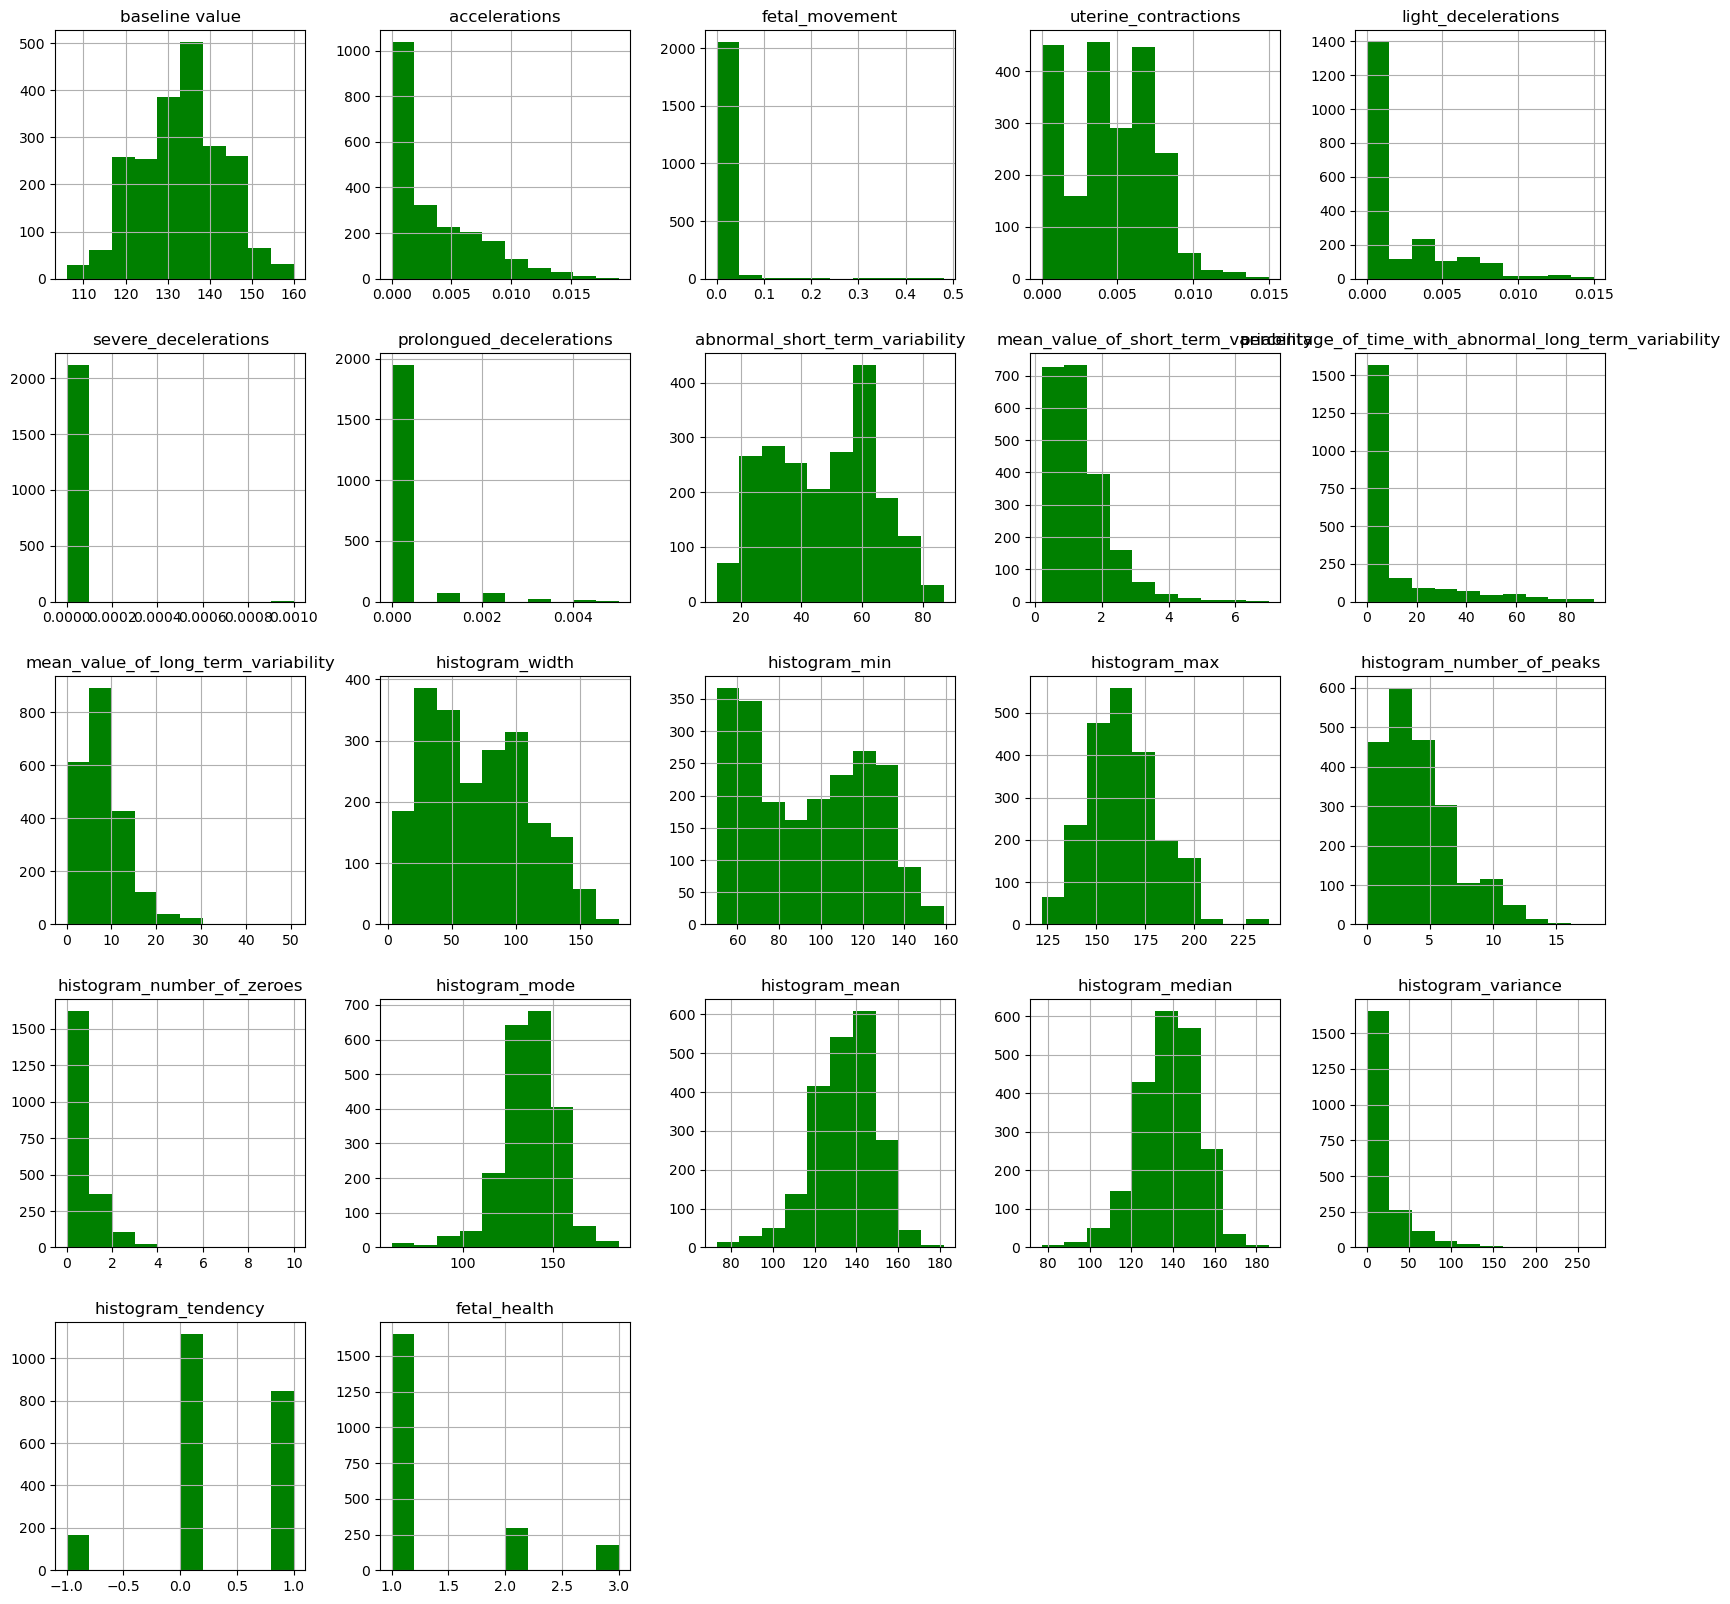

In [4]:
hist_plots =df.hist(figsize=(20,20), color="g")

**We clearly have non-normal distributions when reviewing the histograms, particularly the accelerations and fetal movement plots.**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


The scale of these values are all over the place, we may want to normalize the data using feature scaling

All our data is numerical, except the target itself.

### 5.2 Checking for missing data

In [6]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**There is no missing data, so we don't have to fill or remove any data**

## 5.3 Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

temp_df = df.copy()

In [8]:
X = temp_df.drop("fetal_health", axis=1)
y = temp_df["fetal_health"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

### 5.4 Data Normalization
Let's use `MinMaxScalar` and `StandardScaler` to normalize the data, and see at the end if the difference in general size of the values (e.g. `baseline value` vs `uterine_contractions`) would have impacted our accuracy!

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
X_train.head().T

,1233,480,1111,1303,861
baseline value,125.000,140.000,122.000,137.000,142.000
accelerations,0.000,0.000,0.000,0.005,0.003
fetal_movement,0.000,0.000,0.000,0.000,0.000
uterine_contractions,0.008,0.001,0.000,0.005,0.004
light_decelerations,0.000,0.000,0.001,0.002,0.000
severe_decelerations,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,32.000,60.000,20.000,36.000,46.000
mean_value_of_short_term_variability,1.100,0.800,1.800,0.900,0.700
percentage_of_time_with_abnormal_long_term_variability,3.000,32.000,0.000,0.000,27.000


**Instantiate the scalers**

In [12]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
mm_scaler.fit(X_test)

MinMaxScaler()

In [13]:
s_scaler = StandardScaler()
s_scaler.fit(X_train)
s_scaler.fit(X_test)

StandardScaler()

**Create a new dataframe out of the scaled data**

In [14]:
def auto_scaler(scaler,df):
    return pd.DataFrame(data = scaler.transform(df), columns = df.columns)

In [15]:
# Scaled datasets

## Min-max Scaled
X_train_mm_scaled = auto_scaler(mm_scaler,X_train)
X_test_mm_scaled = auto_scaler(mm_scaler,X_test)

## Standard Scaled
X_train_s_scaled = auto_scaler(s_scaler,X_train)
X_test_s_scaled = auto_scaler(s_scaler,X_test)

# Scaled datasets for X-validation

X_mm_scaled = auto_scaler(mm_scaler,X)
X_s_scaled = auto_scaler(s_scaler,X)

## 5.5 Fitting the Models

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

model_rfc.fit(X_train, y_train)

model_rfc.score(X_test,y_test)

0.9507042253521126

In [17]:
y_preds = model_rfc.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.88      0.83      0.85        64
         3.0       0.87      0.93      0.90        29

    accuracy                           0.95       426
   macro avg       0.91      0.91      0.91       426
weighted avg       0.95      0.95      0.95       426



In [20]:
def recall_pct_conf_mat(y_test,y_preds):
    
    array = confusion_matrix(y_test,y_preds,normalize="true")
    array = array.astype(float)
    
    fig, ax = plt.subplots()
    heatmap = sns.heatmap(array, cmap='Greens', annot=True, linewidths=5, fmt=".1%", annot_kws={"color": "darkgrey", "size": 12})

    ax.set_title('Confusion Matrix - Recall as %')
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

    plt.show()
    
def num_conf_mat(y_test,y_preds):
    
    array = confusion_matrix(y_test,y_preds,normalize=None)
    
    fig, ax = plt.subplots()
    heatmap = sns.heatmap(array, cmap='Greens', annot=True, linewidths=5, fmt=".0f", annot_kws={"color": "darkgrey", "size": 12})

    ax.set_title('Confusion Matrix')
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

    plt.show()

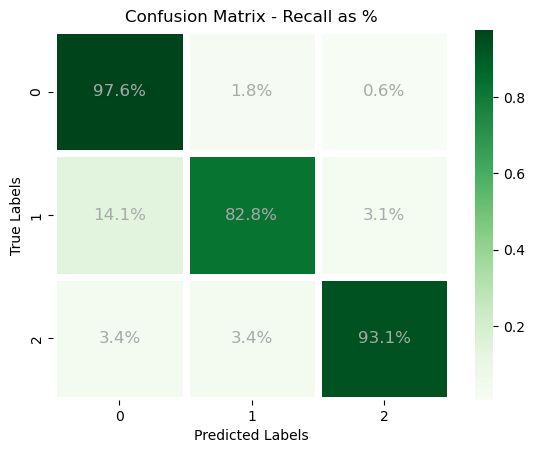

In [21]:
y_preds = model_rfc.predict(X_test)

recall_pct_conf_mat(y_test,y_preds)

**Let's do a Correlation Matrix as well**

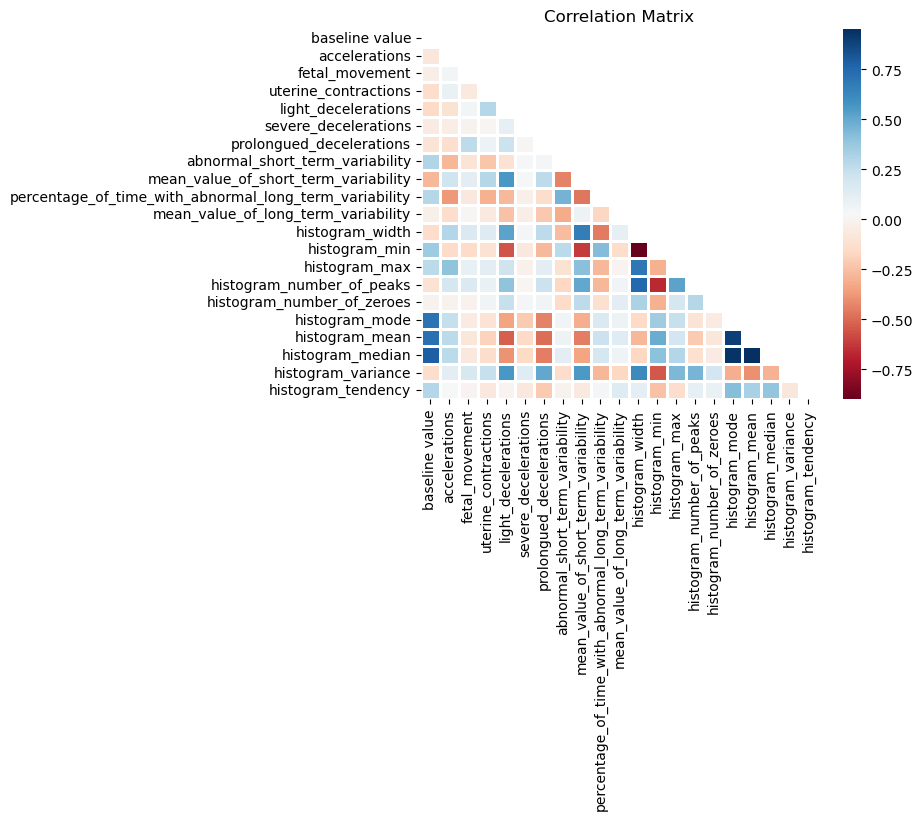

<Figure size 1500x1500 with 0 Axes>

In [22]:
corr_matrix = X.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots()
heatmap = sns.heatmap(corr_matrix, cmap='RdBu', linewidths=1, fmt=".1%", annot_kws={"color": "darkgrey", "size": 12}, mask=mask)
plt.figure(figsize=(15,15))
ax.set_title('Correlation Matrix')
plt.show()

To see which model performs best, we'll do the following:
1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

models_dict = {
                "RandomForestClassifier": RandomForestClassifier(random_state=42),
                "LinearSVC": LinearSVC(random_state=42),
                "KNN": KNeighborsClassifier(),
                "SVC": SVC(random_state=42),
                "LogisticRegression": LogisticRegression(random_state=42),
                "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
                "GaussianNB": GaussianNB()
                }

results = {}

def model_fit_n_score(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model.score(X_test, y_test)
    return results

def model_fit_n_cross_val_score(models, X, y, X_train, y_train):
    '''
    A function which will take a dictionary pipeline of models as an input, fit them on the data provided, then cross validate the data and return the mean cross-validation default model score.
    '''
    
    np.random.seed(42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = np.mean(cross_val_score(model, X, y, cv=5))
    
    return results

**Fit and test the model using the normal dataset**

In [24]:
model_fit_n_score(models_dict, X_train, X_test, y_train, y_test)

C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.9460093896713615,
 'LinearSVC': 0.7065727699530516,
 'KNN': 0.8732394366197183,
 'SVC': 0.8568075117370892,
 'LogisticRegression': 0.8685446009389671,
 'GradientBoostingClassifier': 0.9483568075117371,
 'GaussianNB': 0.8028169014084507}

**Fit and test the model using the scaled dataset**

In [25]:
model_fit_n_score(models_dict, X_train_s_scaled, X_test_s_scaled, y_train, y_test)

C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.9460093896713615,
 'LinearSVC': 0.8732394366197183,
 'KNN': 0.9107981220657277,
 'SVC': 0.903755868544601,
 'LogisticRegression': 0.8802816901408451,
 'GradientBoostingClassifier': 0.9483568075117371,
 'GaussianNB': 0.8051643192488263}

In [26]:
model_fit_n_score(models_dict, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

{'RandomForestClassifier': 0.9460093896713615,
 'LinearSVC': 0.8873239436619719,
 'KNN': 0.9061032863849765,
 'SVC': 0.9107981220657277,
 'LogisticRegression': 0.892018779342723,
 'GradientBoostingClassifier': 0.9483568075117371,
 'GaussianNB': 0.795774647887324}

**Fit and cross-val test the model using the normal dataset**

In [28]:
model_fit_n_cross_val_score(models_dict, X, y, X_train, y_train)

C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converg

{'RandomForestClassifier': 0.864058547362607,
 'LinearSVC': 0.728142502071251,
 'KNN': 0.8250207125103562,
 'SVC': 0.8433736536868268,
 'LogisticRegression': 0.8273692350179509,
 'GradientBoostingClassifier': 0.8908644020988679,
 'GaussianNB': 0.7973001933167633}

**Fit and cross-val test the model using the scaled dataset**

In [29]:
model_fit_n_cross_val_score(models_dict, X_s_scaled, y, X_train_s_scaled, y_train)

C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\JohnC\Desktop\datasets\fetal_health_classification\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converg

{'RandomForestClassifier': 0.8673493510080089,
 'LinearSVC': 0.848079536039768,
 'KNN': 0.824087268710301,
 'SVC': 0.8471372549019607,
 'LogisticRegression': 0.8527765810549572,
 'GradientBoostingClassifier': 0.891804473902237,
 'GaussianNB': 0.812351284175642}

In [31]:
model_fit_n_cross_val_score(models_dict, X_mm_scaled, y, X_train_mm_scaled, y_train)

{'RandomForestClassifier': 0.8664059652029825,
 'LinearSVC': 0.8494990334161834,
 'KNN': 0.8264402098867716,
 'SVC': 0.8476100524716929,
 'LogisticRegression': 0.85561336647335,
 'GradientBoostingClassifier': 0.8908644020988679,
 'GaussianNB': 0.8062391604529136}

**The RandomForestClassifier and the GradientBoostingClassifier performed the best, with the GBC performing slightly better for its cross-val score.  Let's take a deeper look at their scoring metrics to determine which is most appropriate.**

**In this scenario, being a health prediction tool, I would consider a false-positive classification of healthy to be significantly worse than a false-positive case of unhealthy.  This algorithm would likely be employed as a preliminary diagnostic tool that would prompt further testing on the fetus to check the health.  In that case, I'm going to compare their overall accuracy as well as their false-positive rates for both healthy and unhealthy fetus's**

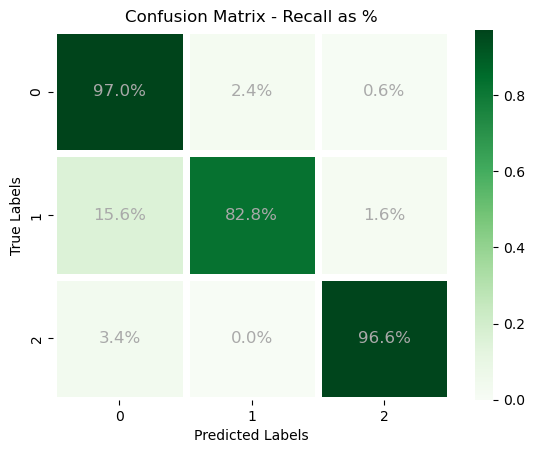

In [32]:
gbc_model = GradientBoostingClassifier(random_state=42)

gbc_model.fit(X_train, y_train)

recall_pct_conf_mat(y_test,gbc_model.predict(X_test))

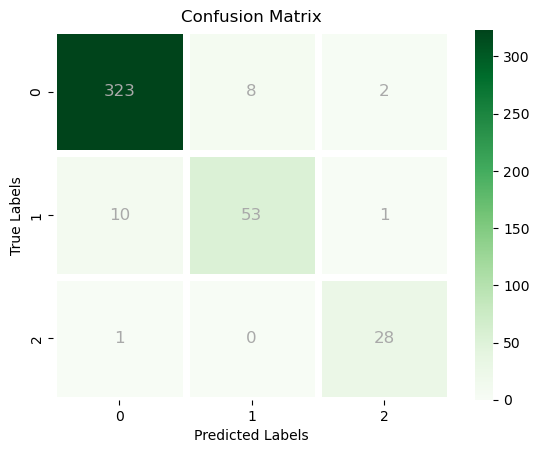

In [33]:
num_conf_mat(y_test,gbc_model.predict(X_test))

In [34]:
print(classification_report(y_test,gbc_model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       333
         2.0       0.87      0.83      0.85        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.95       426
   macro avg       0.91      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



**The GBC has a precision score of 97%, 87%, and 90% for healthy, suspect, and pathological fetus's - respectively.  This indicates that there is a 3% false-positive rate for healthy predictions.**

**The GBC has recall scores for healthy and pathological showing that 97% of actual positives were correctly classified - meaning a 3% false-negative rate.  The suspect category was harder to correctly classify, with a 17% false-negative rate. The vast majority (91%) of suspect fetus's misclassifications were misclassified as healthy, not as pathological.** 

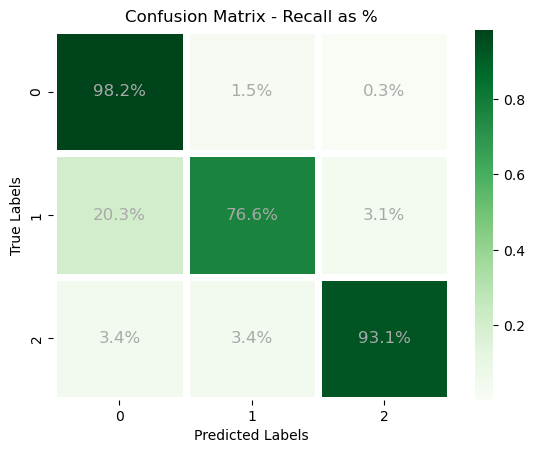

In [35]:
rfc_model = RandomForestClassifier(random_state=42)

rfc_model.fit(X_train, y_train)

recall_pct_conf_mat(y_test,rfc_model.predict(X_test))

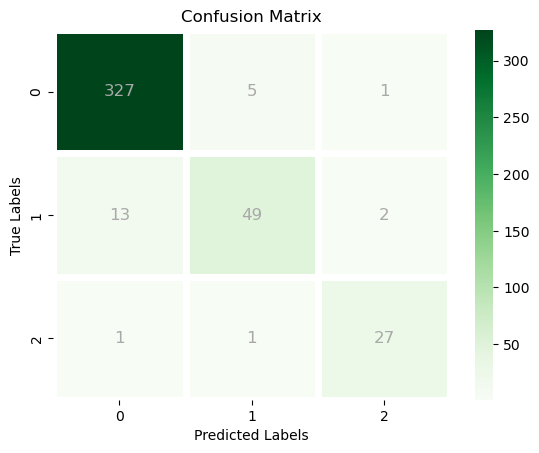

In [36]:
num_conf_mat(y_test,rfc_model.predict(X_test))

In [37]:
print(classification_report(y_test,rfc_model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426



**The RandomForestClassifier has a precision score of 96%, 89%, and 90% for healthy, suspect, and pathological fetus's - respectively.  This indicates that there is a 4% false-positive rate for healthy predictions.**

**The RFC has recall scores of 98% for healthy, 77% for suspect, and 93% for pathological.  Of the actual healthy fetus's we have a 2% false-negative rate.  For the suspect category, the model misclassified 20% of suspect or pathological fetus's as healthy.** 

**Overall, the classification report indicates a higher accuracy over the cross-validated accuracy scores that were calculated.  The cross-val scores indicate that the GBC has a slightly higher accuracy and the classification report indicates a slightly lower false-positive rate for healthy fetus's, so the GradientBoostingClassifier is the model we'll use to hyperparameter tune.**

**Preliminary Results**
* There's a clear improvement in the accuracy score of LinSVC, KNN, SVC, and LogReg when using the scaled data
* In any case, theGradientBoostingClassifier is the best choice
* We'll conduct some hyperparameter tuning to see if we can squeeze out a bit more accuracy

## 5.6 Hyperparameter Tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [39]:
'''
Instantiate the grid for the GradientBoostingClassifier
'''

gbc_grid = {"n_estimators": [50, 100, 200, 500, 1000],
            "max_depth": [None, 5, 10, 20],
            "learning_rate": [0.01, 0.04, 0.07, 0.1],
            "min_samples_split": [2, 4, 6],
            "min_samples_leaf": [1, 2, 4],
            "subsample": [0.5, 0.6, 0.7, 0.8]}

In [40]:
gbc_clf = GradientBoostingClassifier(random_state=42)

rs_gbc_clf = RandomizedSearchCV(estimator=gbc_clf,
                                param_distributions=gbc_grid,
                                n_iter=10,
                                cv=5,
                                verbose=2)

rs_gbc_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.04, max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=50, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.04, max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=50, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.04, max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=50, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.04, max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=50, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.04, max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=50, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.04, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7; total time=  27.1s
[CV] END learning_rate=0.04, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7; t

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.04, 0.07,
                                                          0.1],
                                        'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000],
                                        'subsample': [0.5, 0.6, 0.7, 0.8]},
                   verbose=2)

In [41]:
rs_gbc_clf.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'learning_rate': 0.07}

In [42]:
'''
Instantiate the grid for the GradientBoostingClassifier
'''

gbc_gs_grid = {"n_estimators": [100, 500],
            "max_depth": [None, 5],
            "learning_rate": [0.03, 0.1],
            "min_samples_split": [4],
            "min_samples_leaf": [1, 2],
            "subsample": [0.7]}

In [43]:
gbc_clf = GradientBoostingClassifier(random_state=42)

gs_gbc_clf = GridSearchCV(estimator=gbc_clf,
                                param_grid=gbc_gs_grid,
                                cv=5,
                                verbose=2)

gs_gbc_clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=  10.3s
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=  10.1s
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=  10.0s
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=  10.0s
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=  10.5s
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7; total time=  43.8s
[CV] END learning_rate=0.03, max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsamp

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7; total time=   7.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=500, subsample=0.7; total time=   7.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, m

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.03, 0.1], 'max_depth': [None, 5],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [4],
                         'n_estimators': [100, 500], 'subsample': [0.7]},
             verbose=2)

In [44]:
gs_gbc_clf.best_params_

{'learning_rate': 0.03,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500,
 'subsample': 0.7}

In [45]:
bp_gbc_clf = GradientBoostingClassifier(random_state=42,
                                        subsample= 1,
                                        n_estimators= 1000,
                                        min_samples_split= 4,
                                        min_samples_leaf= 2,
                                        max_depth= None,
                                        learning_rate= 0.01)

bp_gbc_clf.fit(X_train, y_train)

np.mean(cross_val_score(bp_gbc_clf, X, y, cv=5))

0.8508798674399337

In [46]:
bp_gbc_clf.score(X_test,y_test)

0.960093896713615

In [47]:
baseline_gbc = GradientBoostingClassifier(random_state=42)

baseline_gbc.fit(X_train, y_train)

np.mean(cross_val_score(baseline_gbc, X, y, cv=5))

0.8908644020988679

In [48]:
baseline_gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
bp_gbc_clf = GradientBoostingClassifier(random_state=42,
                                        subsample= 1,
                                        n_estimators= 100,
                                        min_samples_split= 2,
                                        min_samples_leaf= 1,
                                        max_depth= 3,
                                        learning_rate= 0.09)

bp_gbc_clf.fit(X_train, y_train)

np.mean(cross_val_score(bp_gbc_clf, X, y, cv=5))

0.888041977354322

In [50]:
feat_imp = baseline_gbc.feature_importances_

In [56]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,
                       "feature_importances":importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot df
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    ax.set_title("Top 20 Most Important Features to Negative Health Impact")

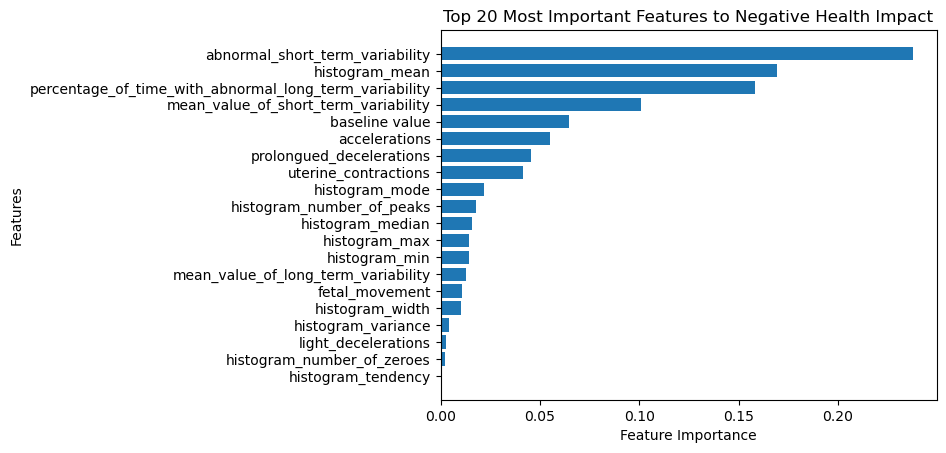

In [57]:
plot_features(X_train.columns,bp_gbc_clf.feature_importances_)

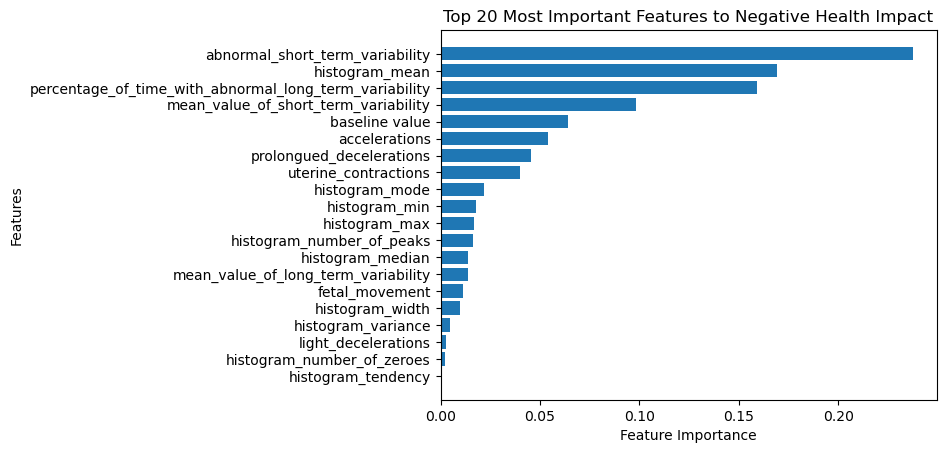

In [58]:
plot_features(X_train.columns,baseline_gbc.feature_importances_)

**After attempting a large variety of hyperparameter tunings, we can conclusively say that the standard GBC model works best for this task**

**Save the model**

In [59]:
import pickle

# save an existing model to file
pickle.dump(baseline_gbc, open("fetal_health_gbc.pkl","wb"))